## Objetivos
Explorar feature engineering e polynomial regression which allowa you to use the machinery of liner regression to fit very complicated, even non-linear functions


## Tools
matplotlib e numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2) # reduced display precision on mumpy arrrays

# Feature Engineering and Polynomial Regression Overview
Out of the box, linear regression provides a means of building models of the form:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+...+w_{n-1}x_{n-1} + b \tag{1}$$
what if your features/data are non linear or are combinations of features? how can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$, $\mathbf{b}$ in (1) will achieve a fit to a non linear curve.

## Polynomial Features
Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. we'll start with a simple quadratic: $y = 1+x^2$

In [11]:
#create a target data
x = np.arange(0,20,1)
print(x)
y = 1 + x**2
print(y)
X = x.reshape(-1,1)
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]


In [12]:
model_w, model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha=1e-2)

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


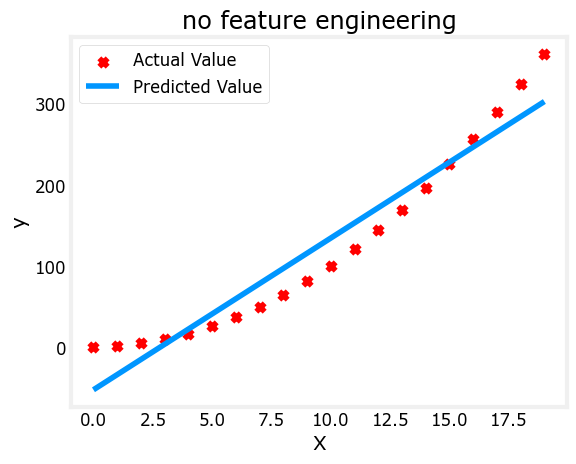

In [13]:
plt.scatter(x,y, marker='x', c='r', label='Actual Value');
plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label='Predicted Value');
plt.xlabel("X");
plt.ylabel("y");
plt.legend();
plt.show();


as expected , not a great fit. what is needed is something like $y = w_0x_0^2 + b$, or a **polynomial feature**.
to accomplish this, you can modify the *input data* to *engineer* the needed features. if you swap the original data with a version that squares the $x$ value, then you can archieve $y= w_0x_0^2 + b$. Swap `X` for `X**2`

In [14]:
# Create target data
x = np.arange(0,20,1)
y = 1 + x**2

# Engineer features
X = x**2  #<-- added engineered feature
print(X)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [15]:
X = X.reshape(-1,1)
model_w, model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha=1e-5)


Iteration         0, Cost: 7.32922e+03
Iteration       100, Cost: 2.26705e-01
Iteration       200, Cost: 2.26497e-01
Iteration       300, Cost: 2.26290e-01
Iteration       400, Cost: 2.26083e-01
Iteration       500, Cost: 2.25876e-01
Iteration       600, Cost: 2.25669e-01
Iteration       700, Cost: 2.25463e-01
Iteration       800, Cost: 2.25256e-01
Iteration       900, Cost: 2.25050e-01
w,b found by gradient descent: w: [1.], b: 0.0090


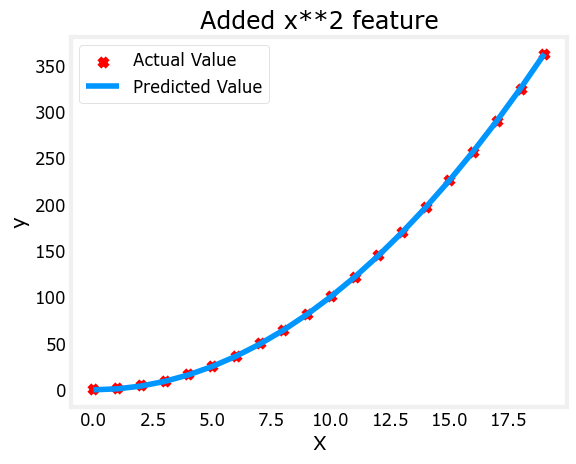

In [17]:
plt.scatter(x,y, marker='x', c='r', label='Actual Value');
plt.title("Added x**2 feature")
plt.plot(x,np.dot(X,model_w) + model_b, label='Predicted Value');
plt.xlabel("X");
plt.ylabel("y");
plt.legend();
plt.show();

great ! near perfect fit. Notice the values of $\mathbf{w}$ and $\mathbf{b}$ printed right above the graph:`w,b found by gradient descent: w:[1.], b: 0.0490`. Gradient descent modified our initial values of $\mathbf{w}$,$\mathbf{b}$ to be (1.0, 0.049) or a model of $y=1*x_0^2+0.049$, very close to our target $y=1*x_0^2+1$. If you ran it longer, it could be metter match. 

### Selecting Features
Above, we knew that an $x^2$ term was required. It may not always be obvious which features are required. One could add a variety of potential features to try and find the most useful. For example, what if we had instead tried : $y=w_0x_0 + w_1x_1^2+ w_2x_2^3+b$ ?

In [3]:
x = np.arange(0,20,1)
y = x**2;
X = np.c_[x,x**2,x**3]

model_w, model_b = run_gradient_descent_feng(X,y,iterations=10000, alpha=1e-7)

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


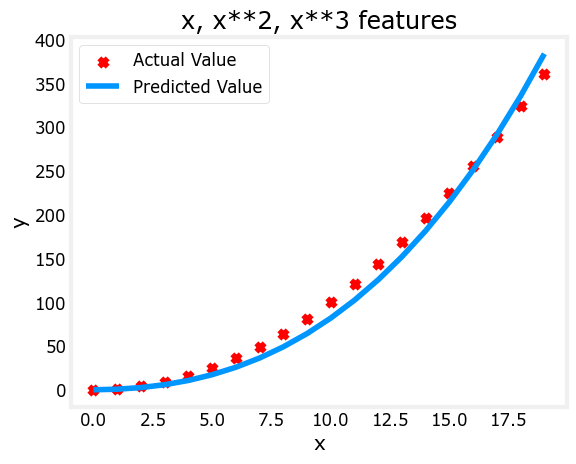

In [4]:
plt.scatter(x,y, marker='x', c='r', label='Actual Value');
plt.title("x, x**2, x**3 features")
plt.plot(x,X@model_w + model_b, label='Predicted Value');
plt.xlabel("x");
plt.ylabel("y");
plt.legend();
plt.show();

Note the value of $mathbf{w}$, `[0.08 0.54 0.03]`and b is `0.0106`. This implies the model after fitting/training is: $$ 0.08x + 0.54x^2 + 0.03x^3 + 0.0106 $$ 
Gradient descent has emphasized the data that is the best fit to the $x^2$ data by increasing the $w_1$ term relative to the others. if you were to run for a very long time, it would continue to reduce the impact of the other terms.
>Gradient descent is picking the 'correct' features for us emphasizing its associated parameter

let's review this idea :
- less weight value implies less important/correct feature, and in extreme , when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data.
- above, after fitting, the weight associated with the $x^2$ feature is much larger than weights for $x$ or $x^3$ as it is the most useful in fitting the data.